<h2 align="center">Machine Learning</h2> 
<h3 align="center">Travis Millburn<br>Fall 2024</h3> 

<center>
<img src="../images/logo.png" alt="drawing" style="width: 300px;"/>
</center>

<h3 align="center">Class 6: Statistics Fundaments for Data Science</h3> 


In [1]:
import pandas
pandas.__version__

'2.2.1'

### Outline

1. Midterm Exam is Next Week: 10/14/2023  
  
2. Fall Break!  No Class Week After Exam: 10/21/2024
  
3. Statistics Review Today
  
4. Sampling (COVID + Elections)
  
5. Mean & Variance
  
6. Covid Data Example


In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Key Statistics Concepts

* Mean & Variance (and related estimates)
* Distributions
* Sampling & Inference
* Correlation (& Causation)

### Good versus Bad Sampling

Is polling this class a good way to estimate the average age of US college students? Why or why not?

<center>
<img src="../images/sampling_clouds_2.png" alt="drawing" style="width: 700px;" />
</center>



<center>
<img src="../images/pop_vs_sample.JPG" alt="drawing" style="width: 700px;" />
</center>

<center>
<img src="../images/pop_vs_sample_2.JPG" alt="drawing" style="width: 900px;" />
</center>

### Random Sampling

A central concept in Statistics. If a sample is randomly taken where every member is equally likely to be chosen, then a concept called the _Central Limit Theorem_ (CLT) (generally known by the related _Law of Large Numbers_), allows us to compute confidence intervals, "$p$-values, etc., describing how good our estimate is.   

Ex: If you sample 100 students randomly, your estimate of the average, e.g., 30.5 years, will have a confidence interval of $\pm 3.5$ years. Meaning the estimate is 63% likely to be within the interval [30.5-3.5, 30.5+3.5].

_HOWEVER_: it all goes out the window if we do a bad job of sampling. 

### "Real-World Sampling"

* Psychology studies that use psychology students.
* Several hours spent recording info on cars that drive on street through campus.
* Internet searches, youtube searches. 
* Study that uses patients who come into their clinic.
* Online polls.

Sampling Bias - error in estimate due to sampling that is not sufficiently random. What kinds of biases might appear in the above list?

### Most basic things to do in statistics:

<ol start="0">
  <li> Data display - _plots, histograms, ..._ </li>
  <li> Compute averages $\rightarrow$ _the mean_</li>
  <li> Quantify variability $\rightarrow$ _variance_, _standard deviation_</li>
</ol>

<center>
<img src="../images/key_terms.JPG" alt="drawing" style="width: 700px;" />
</center>

### Means... Simple averages

<img src="../images/population_and_sample_Nn.png" alt="drawing"  width="30%"  align="right"/>

#### Population mean: $\mu = \frac{\sum_{i=1}^N x_i}{N}$ 

   ...As in _the whole population_

#### Sample mean: $ \bar{x} = \frac{\sum_{i=1}^n x_i}{n}$ 

   ...As in _just the sample_



### Sample Mean (a.k.a. "Mean")

The arithmetic average of the data values

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} = \frac{x_1 + x_2 + \ldots + x_n}{n} $$
    where n is the sample size.
    
* The most common measure of center
* Can be affected by extreme data values (outliers)

<center><img src="../images/mean.png" width="600"></center>

In [3]:
print( (1+2+3+4+5)/5, np.mean((1,2,3,4,5)), (1+2+3+4+10)/5, np.mean((1,2,3,4,10)) )

3.0 3.0 4.0 4.0


### Mode

The most frequently occurred value

* There may be no mode or several modes. "Multimodal" implies multiple peaks in histogram.
* Not affected by extreme values (outliers)
    
<center><img src="../images/mode.png" width="600"></center>

### Percentile

The $p^{th}$ percentile - $p\%$ of the values in the data are less than or equal to this value ($0 \leq p \leq 100$)

#### Quartile: 
* $1^{st}$ quartile = $25^{th}$ percentile
* $2^{nd}$ quartile = $50^{th}$ percentile = median
* $3^{rd}$ quartile = $75^{th}$ percentile
    
<center><img src="../images/quartile.png" width="500"></center>

How might you compute this?

### Variance... trickier

<img src="../images/population_and_sample_Nn.png" alt="drawing"  width="30%"  align="right"/>
    
#### Population variance: $\sigma^2 = \frac{\sum_{i=1}^N (x_i - \mu)^2}{N}$ 

   ...As in _the whole population_

#### Sample variance: $ s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n - 1}$ 

   ...As in _just the sample_
    
Note that sneaky $n-1$ denominator. 

#### Standard deviation = $\sqrt{\text{Variance}}$ 

Variance is a kind of average too.

### Exercise


#### Sample variance: $ s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n - 1}$ 
    
#### Standard deviation = $\sqrt{\text{Variance}}$ 

How do these relate to the norms we covered?

Do these by hand...

In [4]:
import numpy
import pandas
vals = [1, 2, 5, 10, 11, 12, 13, 18]
vals_df = pandas.DataFrame(vals, columns=['value'])
vals_df

,value
0,1
1,2
2,5
3,10
4,11
5,12
6,13
7,18


In [5]:
vals_df['delta'] = vals_df['value'] - vals_df['value'].mean()
vals_df['delta_sq'] = vals_df['delta'] **2
vals_df

,value,delta,delta_sq
0,1,-8.0,64.0
1,2,-7.0,49.0
2,5,-4.0,16.0
3,10,1.0,1.0
4,11,2.0,4.0
5,12,3.0,9.0
6,13,4.0,16.0
7,18,9.0,81.0


In [6]:
#variance:
vals_df['delta_sq'].sum() / (vals_df['delta_sq'].count()  - 1)

34.285714285714285

In [7]:
#std deviation by hand
(vals_df['delta_sq'].sum() / (vals_df['delta_sq'].count()  - 1) ) ** (1/2)

5.855400437691199

In [8]:
#What if we just ask pandas for the variance?
vals_df['value'].var()

34.285714285714285

In [9]:
#What if we just ask pandas for the std_deviation ?
vals_df['value'].std()

5.855400437691199

## What is the mean?

<center><img src="../images/dot_diagram_0.png" alt="drawing" style="width: 700px;"/></center>

       x = [1048 1059 1047 1066 1040 1070 1037 1073]


## <center>What is the mean?</center>

<center>
<img src="../images/fig2-2.png" alt="drawing" style="width: 800px;"/>
</center>





In [10]:
#Calculate by hand
(1048 + 1059 + 1047 + 1066 + 1040 + 1070 + 1037 + 1073)/8

1055.0

In [11]:
x_df = pandas.DataFrame([1048, 1059, 1047, 1066, 1040, 1070, 1037, 1073])
x_df.mean()

0    1055.0
dtype: float64

## What is the Variance & Standard Deviation?

<center>
<img src="../images/fig2-2.png" alt="drawing" style="width: 800px;"/>    
</center>

... how much are these points _spread out_ from the mean?


## What is the Variance & Standard Deviation?

* ## Sample variance: $ s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n - 1}$ 

<center><img src="../images/fig2-3.png" alt="drawing" style="width: 800px;"/></center>

* what are the units of variance and standard deviation?

## Recap

\begin{align}
 \text{Population mean} &= \mu = \frac{\sum_{i=1}^N x_i}{N} \\
 \text{Sample mean}     &= \bar{x} = \frac{\sum_{i=1}^n x_i}{n} \\ 
 \text{Population variance} &= \sigma^2 = \frac{\sum_{i=1}^N (x_i - \mu)^2}{N} \\
 \text{Sample variance}     &= s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n - 1} = \frac{\sum_{i=1}^n x_i^2  - \frac{1}{n}(\sum_{i=1}^n x_i)^2}{n - 1} \\ 
 \text{Standard deviation} &= \sqrt{\text{Variance}}
\end{align}

#### The normal distribution is also referred to as a Gaussian distribution after Carl Friedrich Gauss, a prodigious German mathematician from the late 18th and early 19th century. Another name previously used for the normal distribution was the “error” distribution. Statistically speaking, an error is the difference between an actual value and a statistical estimate like the sample mean.

<center><img src="../images/normal_dist.JPG" alt="drawing" style="width: 800px;"/></center>

### Covariance

When  two  random  variables  X  and  Y  are  not  independent, it  is  frequently  of  interest  to  assess  how strongly  they  are related  to  one  another.

<center><img src="../images/covar.JPG" alt="drawing" style="width: 800px;"/></center>

If  both  variables  tend  to  deviate  in  the  same  direction  (both go  above  their  means  or  below  their  means  at  the  same time),  then  the  covariance  will  be  positive.  If  the  opposite  is true,  the  covariance  will  be  negative.  If  X  and  Y  are  not  strongly  related,  the  covariance  will  be near  0.

<center><img src="../images/covarying.JPG" alt="drawing" style="width: 800px;"/></center>

### Correlation 

<center><img src="../images/corr_coeff.JPG" alt="drawing" style="width: 800px;"/></center>

#### Let's Walk Through an Example w/ COVID DATA

In [12]:
import pandas
import plotly
from plotly import express as px  # This enables the HTML export to contain live chart data
import plotly.graph_objects as go
# import chart_studio.plotly as py
import warnings
warnings.filterwarnings('ignore')

In [13]:
# NYT LIVE COVID DATA
#df = pandas.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv', dtype={'fips':'string'})
df_20 = pandas.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2020.csv', dtype={'fips':'string'}).set_index('date')
df_21 = pandas.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2021.csv', dtype={'fips':'string'}).set_index('date')
df_22 = pandas.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2022.csv', dtype={'fips':'string'}).set_index('date')
df_23 = pandas.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2023.csv', dtype={'fips':'string'}).set_index('date')
df = pandas.concat([df_20, df_21, df_22, df_23]).reset_index()
df['date'] = pandas.to_datetime(df['date'])
df.tail()

,date,county,state,fips,cases,deaths
3525156,2023-03-23,Sweetwater,Wyoming,56037,12519,139.0
3525157,2023-03-23,Teton,Wyoming,56039,12150,16.0
3525158,2023-03-23,Uinta,Wyoming,56041,6416,43.0
3525159,2023-03-23,Washakie,Wyoming,56043,2700,51.0
3525160,2023-03-23,Weston,Wyoming,56045,1906,23.0


In [14]:
df['date'].max()

Timestamp('2023-03-23 00:00:00')

In [15]:
nyc = df[df['county'] == 'New York City']

In [16]:
# SOME FIPS DATA IN CASE WE NEED TO POPULATION WEIGHT SOME THINGS LATER
fips_df = pandas.read_json('https://raw.githubusercontent.com/Zoooook/CoronavirusTimelapse/master/static/population.json', dtype={'us_state_fips':'string', 'us_county_fips':'string'})
fips_df.tail()

,us_state_fips,us_county_fips,population,region,subregion,nyt_population
3138,56,56037,44117,Wyoming,Sweetwater,NaN
3139,56,56039,23059,Wyoming,Teton,NaN
3140,56,56041,20609,Wyoming,Uinta,NaN
3141,56,56043,8129,Wyoming,Washakie,NaN
3142,56,56045,7100,Wyoming,Weston,NaN


In [17]:
# Merge
df = df.merge(fips_df, left_on='fips', right_on='us_county_fips')
df.tail()

,date,county,state,fips,cases,deaths,us_state_fips,us_county_fips,population,region,subregion,nyt_population
3400162,2023-03-23,Sweetwater,Wyoming,56037,12519,139.0,56,56037,44117,Wyoming,Sweetwater,NaN
3400163,2023-03-23,Teton,Wyoming,56039,12150,16.0,56,56039,23059,Wyoming,Teton,NaN
3400164,2023-03-23,Uinta,Wyoming,56041,6416,43.0,56,56041,20609,Wyoming,Uinta,NaN
3400165,2023-03-23,Washakie,Wyoming,56043,2700,51.0,56,56043,8129,Wyoming,Washakie,NaN
3400166,2023-03-23,Weston,Wyoming,56045,1906,23.0,56,56045,7100,Wyoming,Weston,NaN


In [18]:
df.to_pickle('C:\\Users\\Travis Millburn\\OneDrive - University of New Haven\\Class Materials\\Fall 2024\\Week 6\\covid.pkl')

OSError: Cannot save file into a non-existent directory: 'C:\Users\Travis Millburn\OneDrive - University of New Haven\Class Materials\Fall 2024\Week 6'

In [20]:
# Fairfield County, CT
fc = df[(df['county'] == 'Fairfield')  & (df['state'] == 'Connecticut')]
fc['new_cases'] = fc['cases'].diff()
fc['new_cases_pop'] = fc['new_cases'] / (fc['population'] / 1000)
# fc.tail()

In [19]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fc['date'],
    y=fc['cases'],
    name='Cumulative Cases',
    visible='legendonly'
))
fig.add_trace(go.Bar(
    x=fc['date'],
    y=fc['new_cases'],
    name='Daily New Cases'
))
fig.add_trace(go.Scatter(
    x=fc['date'],
    y=fc['new_cases'].rolling(7).mean().round(2),
    name='Daily New Cases 7-DMA'
))
fig.update_layout(hovermode='x', title='Fairfield County CT COVID Cases')
fig.show()

NameError: name 'fc' is not defined

#### What do we notice about # of cases on weekends ?

In [22]:
fc

,date,county,state,fips,cases,deaths,us_state_fips,us_county_fips,population,region,subregion,nyt_population,new_cases,new_cases_pop
104059,2020-03-08,Fairfield,Connecticut,09001,1,0.0,09,09001,944348,Connecticut,Fairfield,NaN,NaN,NaN
104060,2020-03-09,Fairfield,Connecticut,09001,2,0.0,09,09001,944348,Connecticut,Fairfield,NaN,1.0,0.001059
104061,2020-03-10,Fairfield,Connecticut,09001,2,0.0,09,09001,944348,Connecticut,Fairfield,NaN,0.0,0.000000
104062,2020-03-11,Fairfield,Connecticut,09001,3,0.0,09,09001,944348,Connecticut,Fairfield,NaN,1.0,0.001059
104063,2020-03-12,Fairfield,Connecticut,09001,5,0.0,09,09001,944348,Connecticut,Fairfield,NaN,2.0,0.002118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105165,2023-03-19,Fairfield,Connecticut,09001,264712,3026.0,09,09001,944348,Connecticut,Fairfield,NaN,76.0,0.080479
105166,2023-03-20,Fairfield,Connecticut,09001,264719,3026.0,09,09001,944348,Connecticut,Fairfield,NaN,7.0,0.007413
105167,2023-03-21,Fairfield,Connecticut,09001,264752,3027.0,09,09001,944348,Connecticut,Fairfield,NaN,33.0,0.034945
105168,2023-03-22,Fairfield,Connecticut,09001,264784,3027.0,09,09001,944348,Connecticut,Fairfield,NaN,32.0,0.033886


In [54]:
fc.set_index('date').resample('MS')['new_cases'].sum()

#### Mean Cases / day by month

date
2020-03-01     1869.0
2020-04-01     9424.0
2020-05-01     4255.0
2020-06-01     1154.0
2020-07-01     1090.0
2020-08-01     1110.0
2020-09-01     1322.0
2020-10-01     3930.0
2020-11-01    14150.0
2020-12-01    17983.0
2021-01-01    15738.0
2021-02-01     8217.0
2021-03-01     9355.0
2021-04-01     8533.0
2021-05-01     1864.0
2021-06-01      521.0
2021-07-01     1179.0
2021-08-01     4478.0
2021-09-01     4116.0
2021-10-01     2287.0
2021-11-01     3656.0
2021-12-01    24029.0
2022-01-01    52914.0
2022-02-01     5026.0
2022-03-01     3951.0
2022-04-01     6638.0
2022-05-01    12934.0
2022-06-01     5255.0
2022-07-01     7078.0
2022-08-01     5017.0
2022-09-01     5005.0
2022-10-01     3546.0
2022-11-01     3523.0
2022-12-01     6032.0
2023-01-01     4893.0
2023-02-01     2026.0
2023-03-01      709.0
Freq: MS, Name: new_cases, dtype: float64

In [24]:
fc.set_index('date').resample('MS')['new_cases'].mean()

date
2020-03-01      81.260870
2020-04-01     314.133333
2020-05-01     137.258065
2020-06-01      38.466667
2020-07-01      35.161290
2020-08-01      35.806452
2020-09-01      44.066667
2020-10-01     126.774194
2020-11-01     471.666667
2020-12-01     580.096774
2021-01-01     507.677419
2021-02-01     293.464286
2021-03-01     301.774194
2021-04-01     284.433333
2021-05-01      60.129032
2021-06-01      17.366667
2021-07-01      38.032258
2021-08-01     144.451613
2021-09-01     137.200000
2021-10-01      73.774194
2021-11-01     121.866667
2021-12-01     775.129032
2022-01-01    1706.903226
2022-02-01     179.500000
2022-03-01     127.451613
2022-04-01     221.266667
2022-05-01     417.225806
2022-06-01     175.166667
2022-07-01     228.322581
2022-08-01     161.838710
2022-09-01     166.833333
2022-10-01     114.387097
2022-11-01     117.433333
2022-12-01     194.580645
2023-01-01     157.838710
2023-02-01      72.357143
2023-03-01      30.826087
Freq: MS, Name: new_cases, dtype:

In [56]:
# New Haven County, CT
nhc = df[(df['county'] == 'New Haven')  & (df['state'] == 'Connecticut')]
nhc['new_cases'] = nhc['cases'].diff()
nhc['new_cases_pop'] = nhc['new_cases'] / (nhc['population'] / 1000)
# nhc.tail()

In [57]:
# # NYC -- Collection of counties per NYT methodology
nyc['population'] = 8400000
nyc['new_cases'] = nyc['cases'].diff()
nyc['new_cases_pop'] = nyc['new_cases'] / (nyc['population'] / 1000)
# nyc.tail()

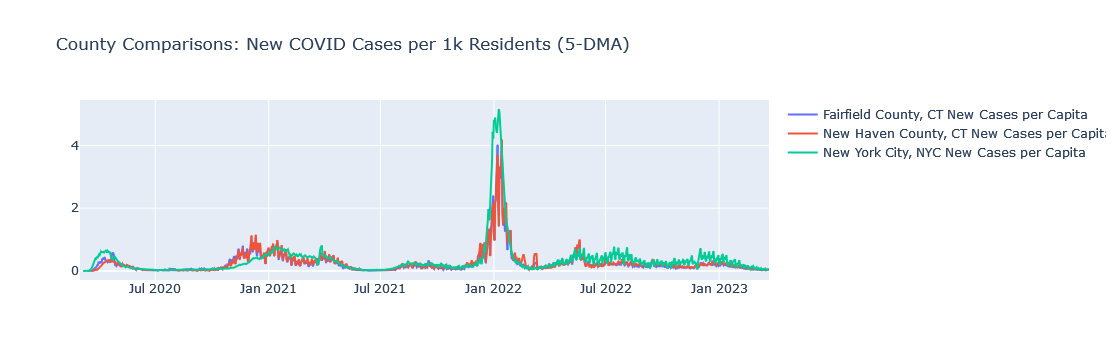

In [58]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fc['date'],
    y=fc['new_cases_pop'].rolling(5).mean().round(2),
    name='Fairfield County, CT New Cases per Capita'
))

fig.add_trace(go.Scatter(
    x=nhc['date'],
    y=nhc['new_cases_pop'].rolling(5).mean().round(2),
    name='New Haven County, CT New Cases per Capita'
))


fig.add_trace(go.Scatter(
    x=nyc['date'],
    y=nyc['new_cases_pop'].rolling(5).mean().round(2),
    name='New York City, NYC New Cases per Capita'
))


fig.update_layout(hovermode='x', title='County Comparisons: New COVID Cases per 1k Residents (5-DMA)')
# py.plot(fig, filename = 'covid-county-per-capita', sharing='secret', auto_open=True)
fig.show()

In [28]:
nhc.tail()

,date,county,state,fips,cases,deaths,us_state_fips,us_county_fips,population,region,subregion,nyt_population,new_cases,new_cases_pop
353290,2023-03-19,New Haven,Connecticut,09009,258237,3176.0,09,09009,859339,Connecticut,New Haven,NaN,56.0,0.065166
353291,2023-03-20,New Haven,Connecticut,09009,258254,3176.0,09,09009,859339,Connecticut,New Haven,NaN,17.0,0.019783
353292,2023-03-21,New Haven,Connecticut,09009,258306,3177.0,09,09009,859339,Connecticut,New Haven,NaN,52.0,0.060512
353293,2023-03-22,New Haven,Connecticut,09009,258358,3177.0,09,09009,859339,Connecticut,New Haven,NaN,52.0,0.060512
353294,2023-03-23,New Haven,Connecticut,09009,258381,3181.0,09,09009,859339,Connecticut,New Haven,NaN,23.0,0.026765


<Axes: xlabel='date'>

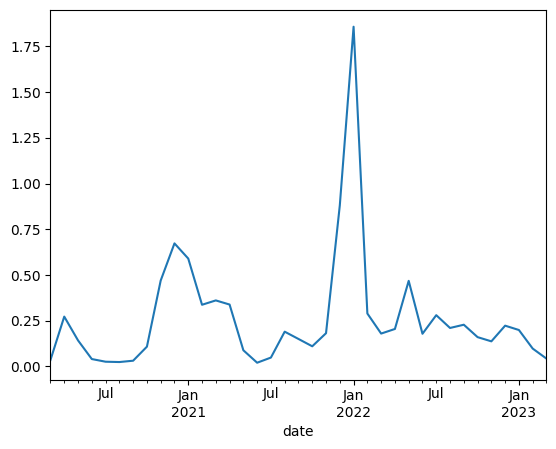

In [29]:
nhc.set_index('date').resample('MS')['new_cases_pop'].mean().plot()

<Axes: xlabel='date'>

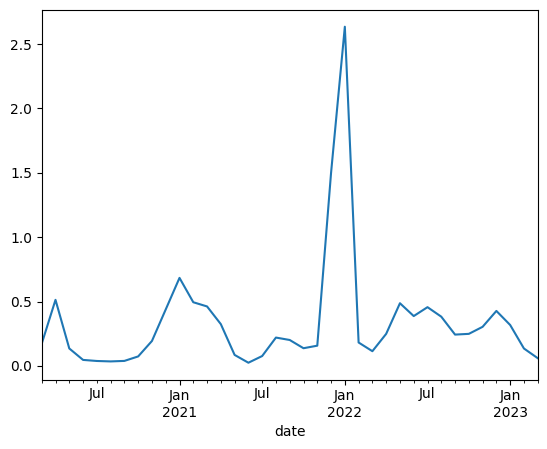

In [30]:
nyc.set_index('date').resample('MS')['new_cases_pop'].mean().plot()

<Axes: xlabel='date'>

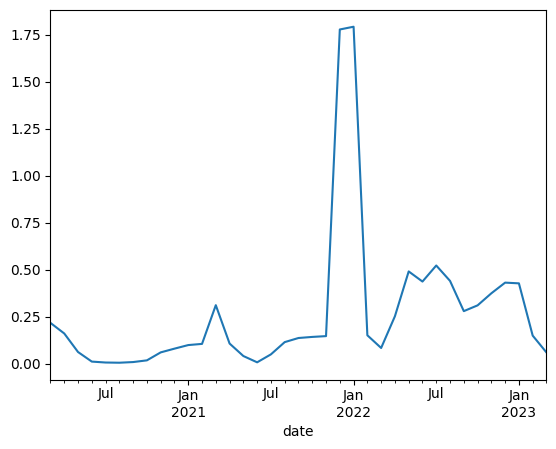

In [31]:
nyc.set_index('date').resample('MS')['new_cases_pop'].std().plot()

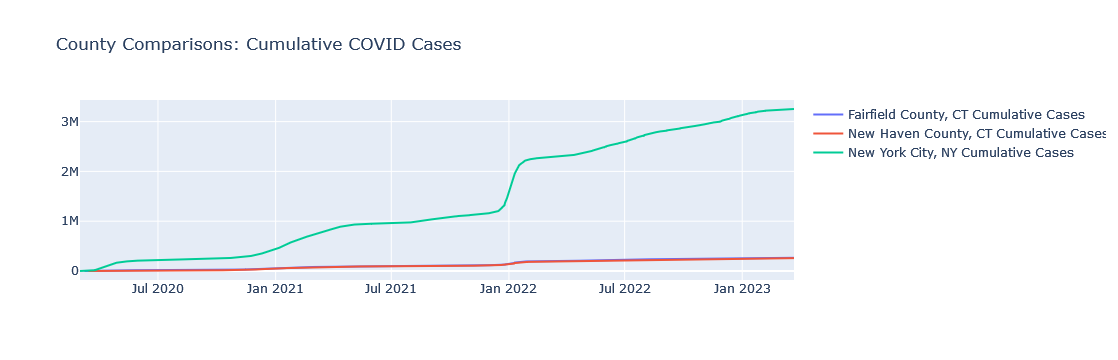

In [32]:
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=fc['date'],
    y=fc['cases'],
    name='Fairfield County, CT Cumulative Cases'
))

fig.add_trace(go.Scatter(
    x=nhc['date'],
    y=nhc['cases'],
    name='New Haven County, CT Cumulative Cases'
))


fig.add_trace(go.Scatter(
    x=nyc['date'],
    y=nyc['cases'],
    name='New York City, NY Cumulative Cases'
))
fig.update_layout(hovermode='x', title='County Comparisons: Cumulative COVID Cases')
#py.plot(fig, filename = 'covid-county-cumulative', sharing='secret', auto_open=True)
fig.show()